In [1]:
import pandas as pd

In [2]:
DEMOGRAPHIC_COEFF = 5
FINANCIAL_COEFF = 10
BEHAVIOURAL_COEFF = 7

In [56]:
age_risk_profile = pd.read_csv('data_label_criteria/Age Risk Profile.csv')
net_worth_risk_profile = pd.read_csv('data_label_criteria/Net Worth Profile.csv')
occupation_risk_profile = pd.read_csv('data_label_criteria/Occupation Risk Profile.csv')
source_of_wealth_risk_profile = pd.read_csv('data_label_criteria/Source of Wealth Risk Profile.csv')
income_risk_profile = pd.read_csv('data_label_criteria/Income Risk Profile.csv')
speed_of_payment_risk_profile = pd.read_csv('data_label_criteria/Speed of Payment Risk Profile.csv')

In [16]:
# read synthetic
synthetic_data = pd.read_csv('final_with_ratios_synthetic_distribution.csv')
synthetic_data['Occupation'].head()

0           24 Business & Administration Professionals
1    33 Business & Administration Associate Profess...
2             43 Numerical & Material-Recording Clerks
3    14 Hospitality, Retail & Related Services Mana...
4               42 Customer Services Officers & Clerks
Name: Occupation, dtype: object

In [6]:
synthetic_data.columns

Index(['wealth - salary', 'wealth - investment gain', 'wealth - rental income',
       'wealth - business revenue', 'wealth - inheritance', 'wealth - others',
       'fund - salary', 'fund - investment gain', 'fund - rental income',
       'fund - business revenue', 'fund - inheritance', 'fund - others', 'Age',
       'Occupation', 'Industry', 'speed_of_payment', 'Income',
       'Adjusted Income', 'Annual Income', 'Adjusted Annual Income',
       'Income Multiplier Based on Age', 'Wealth Indicator', 'Net Worth',
       'Proposed Subscription Amount', 'Net Worth / Total Commitment',
       'Income / Total Commitment'],
      dtype='object')

In [36]:
age_risk_profile.set_index('Age Range').to_dict()['Score']

{'Under 30': 7, '30-40': 6, '40-50': 3, '50-60': 4, '60 and above': 5}

In [37]:
def label_risk_for_age(age):
    age_risk_profile_dict = age_risk_profile.set_index('Age Range').to_dict()['Score']
    if age <= 30:
        return age_risk_profile_dict['Under 30']
    elif age <= 40:
        return age_risk_profile_dict['30-40']
    elif age <= 50:
        return age_risk_profile_dict['40-50']
    elif age <= 60:
        return age_risk_profile_dict['50-60']
    else:
        return age_risk_profile_dict['60 and above']

In [38]:
net_worth_risk_profile.set_index('Asset Range').to_dict()['Score']

{'<$50,000': 8,
 '$50,000 - $100,000': 7,
 '$100,000 - $250,000': 6,
 '$250,000 - $500,000': 5,
 '$500,000 - $1 million': 4,
 '$1 million - $5 million': 3,
 '>$5 million': 2}

In [39]:
def label_risk_for_net_worth(net_worth):
    net_worth_risk_profile_dict = net_worth_risk_profile.set_index('Asset Range').to_dict()['Score']
    if net_worth < 50000:
        return net_worth_risk_profile_dict['<$50,000']
    elif net_worth <= 100000:
        return net_worth_risk_profile_dict['$50,000 - $100,000']
    elif net_worth <= 250000:
        return net_worth_risk_profile_dict['$100,000 - $250,000']
    elif net_worth <= 500000:
        return net_worth_risk_profile_dict['$250,000 - $500,000']
    elif net_worth <= 1000000:
        return net_worth_risk_profile_dict['$500,000 - $1 million']
    elif net_worth <= 5000000:
        return net_worth_risk_profile_dict['$1 million - $5 million']
    else:
        return net_worth_risk_profile_dict['>$5 million']

In [40]:
occupation_risk_profile.set_index('Occupation').to_dict()['Score']

{'11 Legislators, Senior Officials & Chief Executives': 3,
 '12 Administrative & Commercial Managers': 4,
 '13 Production & Specialised Services Managers': 5,
 '14 Hospitality, Retail & Related Services Managers': 6,
 '21 Science & Engineering Professionals': 3,
 '22 Health Professionals': 3,
 '23 Teaching & Training Professionals': 5,
 '24 Business & Administration Professionals': 5,
 '25 Information & Communications Technology Professionals': 4,
 '26 Legal, Social, Religious & Cultural Professionals': 6,
 '31 Physical & Engineering Science Associate Professionals': 5,
 '32 Health Associate Professionals': 5,
 '33 Business & Administration Associate Professionals': 5,
 '34 Legal, Social, Cultural & Related Associate Professionals': 6,
 '35 Information & Communications Technicians': 6,
 '36 Teaching Associate Professionals': 6,
 '39 Other Associate Professionals Not Elsewhere Classified': 6,
 '40 Clerical Supervisors': 5,
 '41 General & Keyboard Clerks': 7,
 '42 Customer Services Offic

In [41]:
def label_risk_for_occupation(occupation):
    occupation_risk_profile_dict = occupation_risk_profile.set_index('Occupation').to_dict()['Score']
    return occupation_risk_profile_dict.get(occupation, None)


In [42]:
income_risk_profile.set_index('Income Range').to_dict()['Score']

{'<$25,000': 8,
 '$25,000 - $50,000': 7,
 '$50,000 - $75,000': 6,
 '$75,000 - $100,000': 5,
 '$100,000 - $150,000': 4,
 '$150,000 - $200,000': 3,
 '>$200,000': 2}

In [43]:
def label_risk_for_income(income):
    income_risk_profile_dict = income_risk_profile.set_index('Income Range').to_dict()['Score']
    if income < 25000:
        return income_risk_profile_dict['<$25,000']
    elif income <= 50000:
        return income_risk_profile_dict['$25,000 - $50,000']
    elif income <= 75000:
        return income_risk_profile_dict['$50,000 - $75,000']
    elif income <= 100000:
        return income_risk_profile_dict['$75,000 - $100,000']
    elif income <= 150000:
        return income_risk_profile_dict['$100,000 - $150,000']
    elif income <= 200000:
        return income_risk_profile_dict['$150,000 - $200,000']
    else:
        return income_risk_profile_dict['>$200,000']


In [59]:
source_of_wealth_risk_profile.set_index('Source of Wealth').to_dict()['Score']

{'Salary': 6,
 'Investment Gain': 4,
 'Business Revenue': 5,
 'Rental Income': 4,
 'Inheritance': 5,
 'Others (including crypto holdings and royalties)': 7}

In [70]:
def label_risk_for_source_of_wealth(salary, investment_gain, rental_income, business_revenue, inheritance, others):
    aggregate_risk = 0
    source_of_wealth_risk_profile_dict = source_of_wealth_risk_profile.set_index('Source of Wealth').to_dict()['Score']
    
    if salary:
        aggregate_risk += source_of_wealth_risk_profile_dict.get('Salary', 0)
    if investment_gain:
        aggregate_risk += source_of_wealth_risk_profile_dict.get('Investment Gain', 0)
    if rental_income:
        aggregate_risk += source_of_wealth_risk_profile_dict.get('Rental Income', 0)
    if business_revenue:
        aggregate_risk += source_of_wealth_risk_profile_dict.get('Business Revenue', 0)
    if inheritance:
        aggregate_risk += source_of_wealth_risk_profile_dict.get('Inheritance', 0)
    if others:
        aggregate_risk += source_of_wealth_risk_profile_dict.get('Others (including crypto holdings and royalties)', 0)

    return aggregate_risk


In [71]:
speed_of_payment_risk_profile.set_index('Payment Speed (Days)').to_dict()['Score']

{'0 - 10 days': 2,
 '11 - 20 days': 3,
 '21 - 30 days': 4,
 '31 - 40 days': 5,
 '41 - 60 days': 6,
 '61 - 80 days': 8}

In [72]:
def label_risk_for_speed_of_payment(payment_speed):
    speed_of_payment_risk_profile_dict = speed_of_payment_risk_profile.set_index('Payment Speed (Days)').to_dict()['Score']
    if 0 <= payment_speed <= 10:
        return speed_of_payment_risk_profile_dict.get('0 - 10 days', 0)
    elif 11 <= payment_speed <= 20:
        return speed_of_payment_risk_profile_dict.get('11 - 20 days', 0)
    elif 21 <= payment_speed <= 30:
        return speed_of_payment_risk_profile_dict.get('21 - 30 days', 0)
    elif 31 <= payment_speed <= 40:
        return speed_of_payment_risk_profile_dict.get('31 - 40 days', 0)
    elif 41 <= payment_speed <= 60:
        return speed_of_payment_risk_profile_dict.get('41 - 60 days', 0)
    elif 61 <= payment_speed <= 80:
        return speed_of_payment_risk_profile_dict.get('61 - 80 days', 0)
    else:
        return 0


In [77]:
def risk_score_formula(age, occupation, income, net_worth, salary, investment_gain, rental_income, business_revenue, inheritance, others, speed_of_payment):
    return \
        DEMOGRAPHIC_COEFF * label_risk_for_age(age) + \
            DEMOGRAPHIC_COEFF * label_risk_for_occupation(occupation) + \
                FINANCIAL_COEFF * label_risk_for_income(income) + \
                    FINANCIAL_COEFF * label_risk_for_net_worth(net_worth) + \
                        FINANCIAL_COEFF * label_risk_for_source_of_wealth(salary, investment_gain, rental_income, business_revenue, inheritance, others) + \
                            BEHAVIOURAL_COEFF * label_risk_for_speed_of_payment(speed_of_payment)

In [78]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 120 to 211
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wealth - salary                 1000 non-null   bool   
 1   wealth - investment gain        1000 non-null   bool   
 2   wealth - rental income          1000 non-null   bool   
 3   wealth - business revenue       1000 non-null   bool   
 4   wealth - inheritance            1000 non-null   bool   
 5   wealth - others                 1000 non-null   bool   
 6   fund - salary                   1000 non-null   bool   
 7   fund - investment gain          1000 non-null   bool   
 8   fund - rental income            1000 non-null   bool   
 9   fund - business revenue         1000 non-null   bool   
 10  fund - inheritance              1000 non-null   bool   
 11  fund - others                   1000 non-null   bool   
 12  Age                             1000 n

In [79]:
synthetic_data.columns

Index(['wealth - salary', 'wealth - investment gain', 'wealth - rental income',
       'wealth - business revenue', 'wealth - inheritance', 'wealth - others',
       'fund - salary', 'fund - investment gain', 'fund - rental income',
       'fund - business revenue', 'fund - inheritance', 'fund - others', 'Age',
       'Occupation', 'Industry', 'speed_of_payment', 'Income',
       'Adjusted Income', 'Annual Income', 'Adjusted Annual Income',
       'Income Multiplier Based on Age', 'Wealth Indicator', 'Net Worth',
       'Proposed Subscription Amount', 'Net Worth / Total Commitment',
       'Income / Total Commitment', 'Risk Score', 'Will Default'],
      dtype='object')

In [80]:
synthetic_data['Risk Score'] = synthetic_data.apply(
    lambda row: risk_score_formula(
        row['Age'], 
        row['Occupation'], 
        row['Annual Income'], 
        row['Net Worth'], 
        row['wealth - salary'], 
        row['wealth - investment gain'], 
        row['wealth - rental income'],
        row['wealth - business revenue'], 
        row['wealth - inheritance'], 
        row['wealth - others'],
        row['speed_of_payment']
    ),
    axis=1
)

In [81]:
synthetic_data.to_csv('labelled_data.csv', index=False)

In [82]:
synthetic_data['Risk Score'].describe()

count    1000.000000
mean      254.286000
std        29.449473
min       187.000000
25%       235.000000
50%       252.000000
75%       271.250000
max       442.000000
Name: Risk Score, dtype: float64

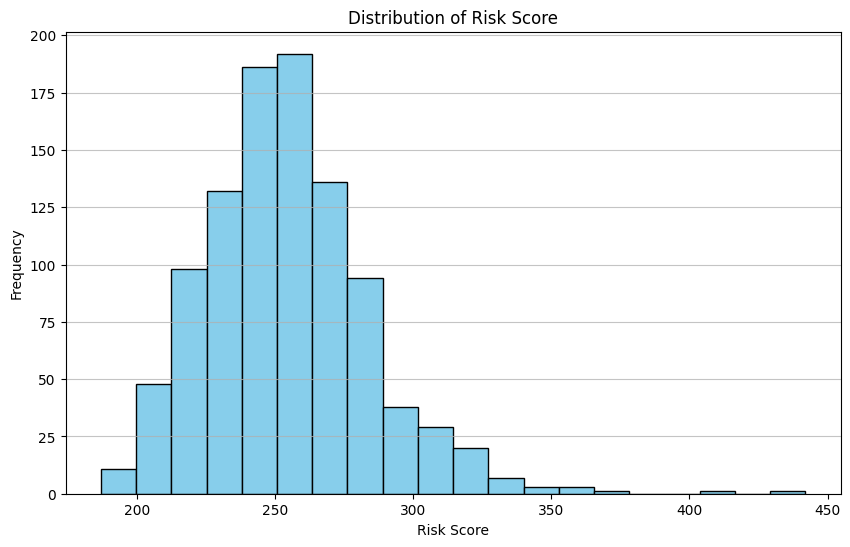

In [83]:
import matplotlib.pyplot as plt

# Plotting the distribution of Risk Score
plt.figure(figsize=(10, 6))
plt.hist(synthetic_data['Risk Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [84]:
synthetic_data['Will Default'] = synthetic_data['Risk Score'].apply(lambda score: score > 160)

In [85]:
synthetic_data['Will Default'].describe()

count     1000
unique       1
top       True
freq      1000
Name: Will Default, dtype: object

In [86]:
synthetic_data = synthetic_data.sort_values(by='Risk Score')


In [87]:
synthetic_data.head(10)

,wealth - salary,wealth - investment gain,wealth - rental income,wealth - business revenue,wealth - inheritance,wealth - others,fund - salary,fund - investment gain,fund - rental income,fund - business revenue,...,Annual Income,Adjusted Annual Income,Income Multiplier Based on Age,Wealth Indicator,Net Worth,Proposed Subscription Amount,Net Worth / Total Commitment,Income / Total Commitment,Risk Score,Will Default
120,False,True,False,False,False,False,False,False,True,False,...,151128.00,151128.00,3.0,50000,503384.00,29000,17.358069,5.211310,187,True
647,False,True,False,False,False,False,False,False,False,True,...,130478.40,130478.40,3.5,50000,506674.40,20000,25.333720,6.523920,190,True
545,False,True,False,False,False,False,True,False,False,False,...,118635.00,118635.00,4.0,50000,524540.00,24000,21.855833,4.943125,190,True
578,False,True,False,False,False,False,True,False,False,False,...,100152.00,100152.00,3.5,50000,400532.00,16000,25.033250,6.259500,193,True
742,False,True,False,False,False,False,False,True,False,False,...,114917.40,114917.40,3.0,50000,394752.20,21000,18.797724,5.472257,195,True
114,False,True,False,False,False,False,True,False,False,False,...,120566.04,120566.04,3.0,50000,411698.12,21000,19.604672,5.741240,195,True
471,False,False,True,False,False,False,False,False,False,True,...,85140.72,85140.72,4.0,50000,390562.88,17000,22.974287,5.008278,196,True
74,False,True,False,False,False,False,False,False,False,True,...,77464.20,77464.20,4.0,50000,359856.80,18000,19.992044,4.303567,196,True
34,False,False,True,False,False,False,True,False,False,False,...,139432.80,139432.80,3.5,50000,538014.80,22000,24.455218,6.337855,197,True
63,False,False,True,False,False,False,True,False,False,False,...,108380.16,0.00,2.0,50000,266760.32,7000,38.108617,15.482880,198,True


In [88]:
synthetic_data.to_csv('sorted_labelled_data.csv', index=False)